least square solution : 
w = [w0 w1] (haut en bas) = (X^T X)^-1 X^T y = A^-1 c
where : A = X^T X and c = X^T y

Idéalement il surfit d'inverser : w = X-1 y mais c'est possible que si X est une matrice carré

Généralisation inverse : 
w = [w0 w1] (haut en bas) = [(X^T X)^-1 X^T] y = X^(dage) y

Next cell : Test of Linear regression by matrix (for Lab 22 video)

[1. 1. 1.] [1. 1. 1.]
[1 2 3] [1 2 3]
[1 3 2] [1 3 2]


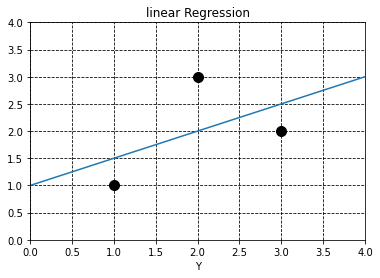

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
# creat input data
N=3
x = np.array([1,2,3])
y = np.array([1,3,2])

one = np.ones(N)
print(one,one.T)
print(x,x.T)
X = np.column_stack((one.T,x.T))
C = np.matmul(X.T,X)
Cinv = np.matmul(inv(C),X.T)
print(y,y.T)
w = np.matmul(Cinv,y.T)

#lambda 
PW = 0.00001
#Dual solution
#C = np.matrix(X)*np.matrix(X.T)
#I = np.identity(N)
#Cinv = inv(C+PW*I)
#Xgi = np.matrix(X.T)*np.matrix(Cinv)
#w = np.matrix(Xgi)*np.matrix(y.T)

#Create regression
start = 0 
end = 4 
M = 100

x0=np.linspace(start,end,num=M)
y0=w[0] + w[1]*x0

#plot 
plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(start,end)
plt.ylim(start,end)
plt.grid(color='k',linestyle='--')
plt.show()


Next cell : Test of Linear second order regression by matrix (for Lab 22 video)

[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


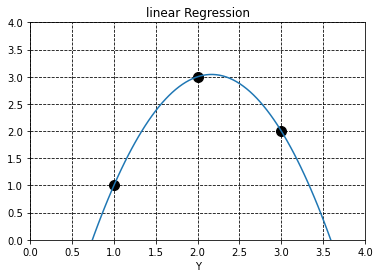

In [3]:

one = np.ones(N)
x_square=np.power(x,2)
X = np.column_stack((one.T,x.T,x_square.T))
print(X)
Cinv=inv(X)
w = np.matmul(Cinv,y.T)



#Create regression
start = 0 
end = 4 
M = 100

x0=np.linspace(start,end,num=M)
x0_square = np.power(x0,2)
y0=w[0] + w[1]*x0 + w[2]*x0_square


#plot 
plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(start,end)
plt.ylim(start,end)
plt.grid(color='k',linestyle='--')
plt.show()

Square cube regression + Lambda !

w = [w0 w1 w2 w3] (haut en bas) = [(X^T X + 10^-6 I_4)^-1 X^T]y = [-0.768  0.575 1.732 -0.539]

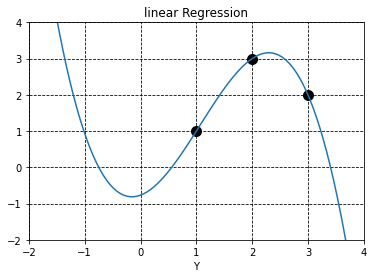

In [4]:
PW = 0.00001
one = np.ones(N)

x_square=np.power(x,2)
x_cube=np.power(x,3)

X = np.column_stack((one.T,x.T,x_square.T,x_cube.T))
C = np.matmul(X.T,X)
I = np.identity(4)
Cinv = np.matmul(inv(C+PW*I),X.T)
#Cinv = np.matmul(inv(C),X.T)
w = np.matmul(Cinv,y.T)

#Create regression
start = -2 
end = 4 
M = 100

x0=np.linspace(start,end,num=M)
x0_square = np.power(x0,2)
x0_cube = np.power(x0,3)
y0=w[0] + w[1]*x0 + w[2]*x0_square + w[3]*x0_cube

#plot 
plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(start,end)
plt.ylim(start,end)
plt.grid(color='k',linestyle='--')
plt.show()

Dual solution : 
w =  X^T (X X^T + lambda I_N)^-1 y

note that : X^T (X X^T + lambda I_N)^-1 = [(X^T X + lambda I_(p+1))^-1 X^T

Sinus : 

Solution (primal = 1, dual = 0): 0
Polynomial order: 3
Dual Inverse:
[[ 1.59999471  0.26666406 -0.40000122 -0.56666653 -0.39999667 -0.06665908
   0.26667236  0.43332943  0.26664617 -0.399987  ]
 [-0.92540505  0.08119913  0.52875114  0.56507444  0.33799251 -0.00467045
  -0.31507884 -0.44541146 -0.24784515  0.42539636]
 [ 0.15734227 -0.03729667 -0.115968   -0.11072278 -0.05361242  0.02331226
   0.08799621  0.10839021  0.05244416 -0.11188574]
 [-0.0081585   0.00271955  0.00679881  0.00602176  0.00233097 -0.00233116
  -0.00602178 -0.00679866 -0.00271933  0.00815839]]
Regression coefficients :
[-0.24900096  1.48721328 -0.32664319  0.01841685]


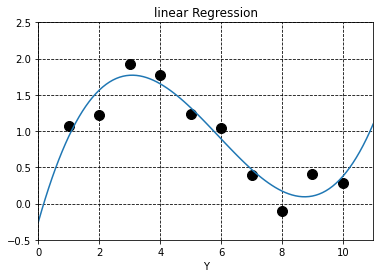

In [5]:
N = 10 
x = np.array([1,2,3,4,5,6,7,8,9,10])
noise = 0.15*np.random.normal(0,1,10)
y=np.zeros((N))
for i in range(0,N):
    y[i]= np.sin(i*2*np.pi/N)+noise[i]+1
y = np.array([1.07,1.22,1.93,1.77,1.24,1.04,0.39,-0.10,0.41,0.29])
primal=0
print('Solution (primal = 1, dual = 0):',primal)
p=3
print('Polynomial order:',p)
PW=0.000001
one = np.ones(N)
x_square = np.power(x,2)
x_cube = np.power(x,3)
if p == 1 :
    X = np.column_stack((one.T,x.T))
if p == 2 :
    X = np.column_stack((one.T,x.T,x_square.T))
if p == 3 :
    X = np.column_stack((one.T,x.T,x_square.T,x_cube.T))
if primal == 1 :
    C = np.matmul(X.T,X)
    I = np.identity(p+1)
    Cinv = inv(C+PW*I)
    Xgi = np.matmul(Cinv,X.T)
    print('Primal Inverse:')
    print(Xgi)
    w = np.matmul(Xgi,y.T)
if primal == 0 : 
    C = np.matmul(X,X.T)
    I = np.identity(N)
    Cinv = inv(C+PW*I)
    Xgi = np.matmul(X.T,Cinv)
    print('Dual Inverse:')
    print(Xgi)
    w = np.matmul(Xgi,y.T)
    
print("Regression coefficients :")
print(w)

xstart=0
xend=11
ystart = -0.5
yend = 2.5
M = 100

x0 = np.linspace(xstart,xend,M)
x0_square=np.power(x0,2)
x0_cube=np.power(x0,3)
if p==1:
    y0 = w[0] + w[1]*x0
if p==2:
    y0 = w[0] + w[1]*x0 + w[2]*x0_square    
if p==3:
    y0 = w[0] + w[1]*x0 + w[2]*x0_square + w[3]*x0_cube



    
#plot 
plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(xstart,xend)
plt.ylim(ystart,yend)
plt.grid(color='k',linestyle='--')
plt.show()


y_i = w0 phi_0 (x_i) + w1 phi_1 (x_i) + ... + wm phi_m (x_i) = Somme de j=0  à M de (w_j phi_j (x_i), i=1,2,...,N) 

Gaussian bassic function : 
Phi_j (x_i)=exp[-(x_i - µ_j)²/(2 sigma²)]

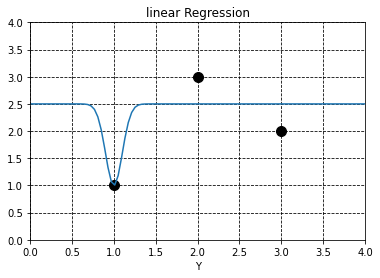

In [6]:
# creat input data
N=3
x = np.array([1,2,3])
y = np.array([1,3,2])

mu1 = 1
mu2 = 2
mu3 = 3
sigma = 0.1
one = np.ones(N)

phi1=np.zeros((N))
phi2=np.zeros((N))
phi3=np.zeros((N))

w = np.zeros((N))

xstart= 0
xend = 4
ystart = 0
yend = 4
M = 100

x0 = np.linspace(xstart,xend,num=M)
y0 = np.zeros((M))
y1 = np.zeros((M))
y2 = np.zeros((M))

for i in range(0,N):
    phi1[i]=np.exp(-(x[i]-mu1)**2/(2*sigma**2))
phi = np.column_stack((one.T,phi1.T))
A = np.matmul(phi.T,phi)
c = np.matmul(phi.T,y)

PW = 0.000001
I = np.identity(2)
A_inv = inv(A + PW*I)
w = np.matmul(A_inv,c)
#compute output 
for i in range(0,M):
    phi01 = np.exp(-(x0[i]-mu1)**2/(2*sigma**2))
    y0[i] = w[0] + w[1]*phi01
    
    


#Create regression
start = 0 
end = 4 
M = 100

x0=np.linspace(start,end,num=M)
#y0=w[0] + w[1]*x0

#plot 
plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(start,end)
plt.ylim(start,end)
plt.grid(color='k',linestyle='--')
plt.show()

With two reponse element now

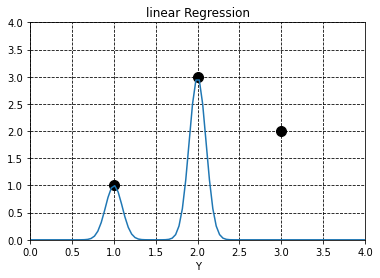

In [7]:
#two basis functions (continuation of earlier code)
for i in range(0,N):
    phi2[i] = np.exp(-(x[i]-mu2)**2/(2*sigma**2))
phi = np.column_stack((phi1.T,phi2.T))
A = np.matmul(phi.T,phi)
c = np.matmul(phi.T,y)

PW = 0.000001
I = np.identity(2)
A_inv = inv(A + PW*I)
w = np.matmul(A_inv,c)
#compute output 
for i in range(0,M):
    phi01 = np.exp(-(x0[i]-mu1)**2/(2*sigma**2))
    phi02 = np.exp(-(x0[i]-mu2)**2/(2*sigma**2))
    y0[i] = w[0]*phi01 + w[1]*phi02

plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(start,end)
plt.ylim(start,end)
plt.grid(color='k',linestyle='--')
plt.show()

With three element now

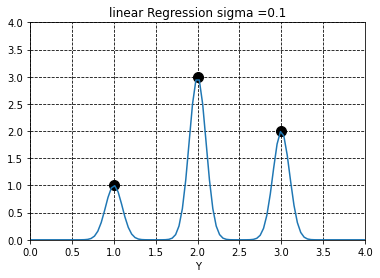

In [8]:
#two basis functions (continuation of earlier code)
for i in range(0,N):
    phi3[i] = np.exp(-(x[i]-mu3)**2/(2*sigma**2))
phi = np.column_stack((phi1.T,phi2.T,phi3.T))
A = np.matmul(phi.T,phi)
A_inv = inv(A)
c = np.matmul(phi.T,y)
w = np.matmul(A_inv,c)

#compute output 
for i in range(0,M):
    phi01 = np.exp(-(x0[i]-mu1)**2/(2*sigma**2))
    phi02 = np.exp(-(x0[i]-mu2)**2/(2*sigma**2))
    phi03 = np.exp(-(x0[i]-mu3)**2/(2*sigma**2))
    y0[i] = w[0]*phi01 + w[1]*phi02 + w[2]*phi03

plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression sigma =0.1')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(start,end)
plt.ylim(start,end)
plt.grid(color='k',linestyle='--')
plt.show()

Next cell, just change Sigma = 1 :

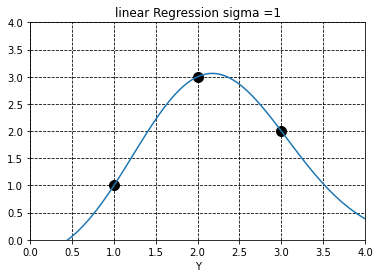

In [9]:
# creat input data
N=3
x = np.array([1,2,3])
y = np.array([1,3,2])

mu1 = 1
mu2 = 2
mu3 = 3
sigma = 1
one = np.ones(N)

phi1=np.zeros((N))
phi2=np.zeros((N))
phi3=np.zeros((N))
w = np.zeros((N))

xstart= 0
xend = 4
ystart = 0
yend = 4
M = 100

x0 = np.linspace(xstart,xend,num=M)
y0 = np.zeros((M))
y1 = np.zeros((M))
y2 = np.zeros((M))

for i in range(0,N):
    phi1[i]=np.exp(-(x[i]-mu1)**2/(2*sigma**2))
    phi2[i] = np.exp(-(x[i]-mu2)**2/(2*sigma**2))
    phi3[i] = np.exp(-(x[i]-mu3)**2/(2*sigma**2))
phi = np.column_stack((phi1.T,phi2.T,phi3.T))
A = np.matmul(phi.T,phi)
c = np.matmul(phi.T,y)

PW = 0.000001
I = np.identity(3)
A_inv = inv(A + PW*I)
w = np.matmul(A_inv,c)
    
#Create regression
start = 0 
end = 4 
M = 100

x0=np.linspace(start,end,num=M)

#compute output 
for i in range(0,M):
    phi01 = np.exp(-(x0[i]-mu1)**2/(2*sigma**2))
    phi02 = np.exp(-(x0[i]-mu2)**2/(2*sigma**2))
    phi03 = np.exp(-(x0[i]-mu3)**2/(2*sigma**2))
    y0[i] = w[0]*phi01 + w[1]*phi02 + w[2]*phi03

plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,y0)
plt.title('linear Regression sigma =1')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(start,end)
plt.ylim(start,end)
plt.grid(color='k',linestyle='--')
plt.show()

In [10]:
#create polynomial kernel, where p = polynomial order 
p = 3
K = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        K[i,j]= (1 + x[i]*x[j])**p
#invert kernel and create the dual variable vector a
PW = 0.000001
I = np.identity(N)
Kinv = inv(K+PW*I)
a = np.matmul(Kinv,y.T)
#compute output
xstart=-1
xend=4
ystart=-2
yend=4
M=50

x0=np.linspace(xstart, xend,num=M)
ykp=np.zeros((M))
for i in range(0,M):
    for j in range(0,N):
        ykp[i] += a[j]*(1+x0[i]*x[j])**p




Now for gaussian 

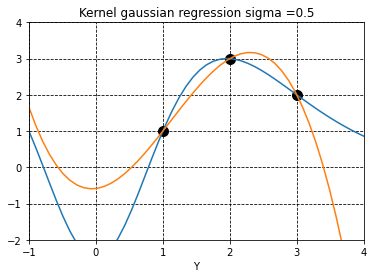

In [11]:
sigma = 2
K = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        K[i,j]= np.exp(-(x[i]*x[j])**2/(2*sigma**2))
#invert kernel and create the dual variable vector a
PW = 0.000001
I = np.identity(N)
Kinv = inv(K+PW*I)
a = np.matmul(Kinv,y.T)
#compute output
xstart=-1
xend=4
ystart=-2
yend=4
M=50

x0=np.linspace(xstart, xend,num=M)
ykg=np.zeros((M))
for i in range(0,M):
    for j in range(0,N):
        ykg[i] += a[j] * np.exp(-(x0[i]*x[j])**2/(2*sigma**2))

        
plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,ykg)
plt.plot(x0,ykp)
plt.title('Kernel gaussian regression sigma =0.5')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(xstart,xend)
plt.ylim(ystart,yend)
plt.grid(color='k',linestyle='--')
plt.show()

SINUS  :

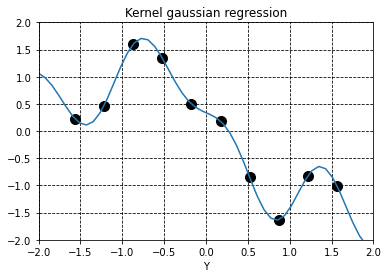

In [12]:
N = 10 
x = np.array([1,2,3,4,5,6,7,8,9,10])
mx=np.mean(x)
sx=np.std(x)
x = (x-mx)/sx
noise = 0.15*np.random.normal(0,1,10)
y=np.zeros((N))
for i in range(0,N):
    y[i]= np.sin(i*2*np.pi/N)+noise[i]+1    
y = np.array([1.07,1.22,1.93,1.77,1.24,1.04,0.39,-0.10,0.41,0.29])
my=np.mean(y)
sy=np.std(y)
y=(y-my)/sy
p=10

#compute output
xstart=-2
xend=2
ystart=-2
yend=2
M=50
x0=np.linspace(xstart, xend,num=M)
I = np.identity(N)

sigma = 0.5
K = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        K[i,j]= np.exp(-(x[i]-x[j])**2/(2*sigma**2))
#invert kernel and create the dual variable vector a
PW = 0.000001

Kinv = inv(K+PW*I)
a = np.matmul(Kinv,y.T)
ykg=np.zeros((M))
for i in range(0,M):
    for j in range(0,N):
        ykg[i] += a[j] * np.exp(-(x0[i]-x[j])**2/(2*sigma**2))

        
plt.figure(1)
plt.scatter(x,y,c='black',s=100)
plt.plot(x0,ykg)
plt.title('Kernel gaussian regression')
plt.xlabel('X')
plt.xlabel('Y')
plt.xlim(xstart,xend)
plt.ylim(ystart,yend)
plt.grid(color='k',linestyle='--')
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generate_impedance(frequencies):
    R = 50
    C = 1e-6
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return np.abs(impedance)

# Génération des fréquences de 40Hz à 200MHz.
X = np.linspace(40, 200e6, 1000).reshape(-1, 1)

# Génération des impédances correspondantes.
y = generate_impedance(X)



PSEUDO RBFs function avec des fonctions de scipy

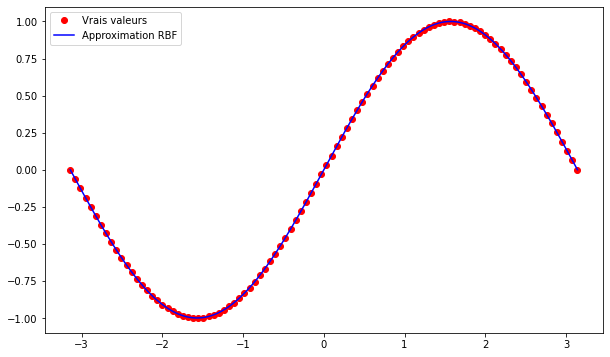

In [14]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.linalg import solve

# La fonction que nous voulons approximer
def f(x):
    return np.sin(x)

# RBF gaussienne
#def gaussian_rbf(x, c, s):
#    return np.exp(-0.5 * ((x - c) / s) ** 2)

# Construction de la matrice RBF
def rbf_matrix(X, Xp, s):
    pairwise_dists = cdist(X, Xp, 'euclidean')
    return np.exp(-0.5 * (pairwise_dists / s) ** 2)

# Les points d'échantillonnage
N = 100
X = np.linspace(-np.pi, np.pi, N).reshape(-1, 1)
y = f(X)

# Les points de prédiction
Xp = np.linspace(-np.pi, np.pi, 1000).reshape(-1, 1)

# Le paramètre de largeur de la RBF
s = 0.1

# Construction de la matrice RBF et résolution du système linéaire
A = rbf_matrix(X, X, s)
w = solve(A, y)

# Prédiction
Ap = rbf_matrix(Xp, X, s)
yp = Ap.dot(w)

# Tracer la fonction réelle et l'approximation
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'ro', label='Vrais valeurs')
plt.plot(Xp, yp, 'b-', label='Approximation RBF')
plt.legend()
plt.show()

End of PSEUDO RBFs function with fonctions from scipy

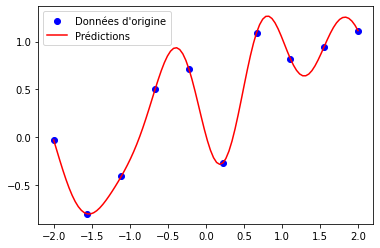

In [15]:
import numpy as np
from numpy.linalg import inv

# Cette fonction calcule une matrice de noyau K où chaque élément K[i, j] est le résultat
# du noyau gaussien calculé entre X[i] et X[j].
def gaussian_kernel_matrix(X, sigma):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = np.exp(-(X[i] - X[j])**2 / (2*sigma**2))
    return K

# Cette fonction effectue une régression par noyau gaussien en utilisant une approche matricielle.
# Elle prend en entrée :
# - X, les points de données
# - y, les valeurs correspondantes
# - x0, les points où nous voulons prédire les valeurs
# - sigma, la largeur du noyau gaussien
# - pw, un petit paramètre pour éviter les problèmes numériques lors de l'inversion de la matrice
# Elle renvoie :
# - y0, les valeurs prédites aux points x0
def kernel_regression_method1(X, y, x0, sigma, pw=0.000001):
    N = X.shape[0]  # Nombre de points de données
    I = np.identity(N)  # Matrice identité de taille N

    # Calcul de la matrice de noyau K
    K = gaussian_kernel_matrix(X, sigma)

    # Inversion de la matrice K + pw*I. L'ajout de pw*I est une technique de régularisation pour éviter 
    # les problèmes numériques lors de l'inversion d'une matrice qui pourrait être singulière ou mal conditionnée.
    Kinv = inv(K + pw*I)

    # Calcul des coefficients a, qui sont utilisés pour pondérer les contributions de chaque point de données 
    # lors de la prédiction des valeurs de y pour de nouveaux points de données.
    a = np.matmul(Kinv, y)

    # Calcul des valeurs prédites y0 pour les points de prédiction x0.
    M = x0.shape[0]  # Nombre de points de prédiction
    y0 = np.zeros(M)
    for i in range(M):
        for j in range(N):
            y0[i] += a[j] * np.exp(-(x0[i] - X[j])**2 / (2*sigma**2))

    return y0

def plot_data_and_predictions(X, y, X_pred, y_pred):
    # Création d'une nouvelle figure
    plt.figure()

    # Tracé des données d'origine en points bleus
    plt.scatter(X, y, color='blue', label='Données d\'origine')

    # Tracé des prédictions en ligne rouge
    plt.plot(X_pred, y_pred, color='red', label='Prédictions')

    # Ajout d'une légende
    plt.legend()

    # Affichage du graphique
    plt.show()

np.random.seed(0)
X = np.linspace(-2, 2, 10).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.5, size=(10, 1))

X_pred = np.linspace(-2, 2, 100).reshape(-1, 1)
y_pred = kernel_regression_method1(X, y, X_pred, sigma=0.5)

plot_data_and_predictions(X, y, X_pred, y_pred)



kernel with impedance data

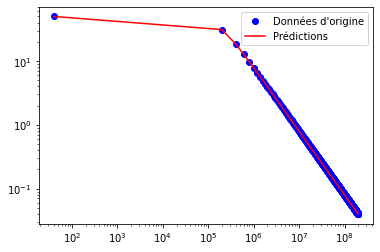

In [16]:
# Génération des fréquences de 40Hz à 200MHz.
X = np.linspace(40, 200e6, 1000).reshape(-1, 1)

# Génération des impédances correspondantes.
y = generate_impedance(X)

X_pred = np.linspace(40, 200e6, 1000).reshape(-1, 1)
y_pred = kernel_regression_method1(X, y, X_pred, sigma=0.5)
def plot_data_and_predictions(X, y, X_pred, y_pred):
    # Création d'une nouvelle figure
    plt.figure()

    # Tracé des données d'origine en points bleus
    plt.scatter(X, y, color='blue', label='Données d\'origine')

    # Tracé des prédictions en ligne rouge
    plt.plot(X_pred, y_pred, color='red', label='Prédictions')
    plt.xscale("log")
    plt.yscale("log")
    # Ajout d'une légende
    plt.legend()

    # Affichage du graphique
    plt.show()
plot_data_and_predictions(X, y, X_pred, y_pred)

FIN lab23 regression par Kernel ok

Test on DRT1

before solve


/tmp/ipykernel_298/4274429870.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


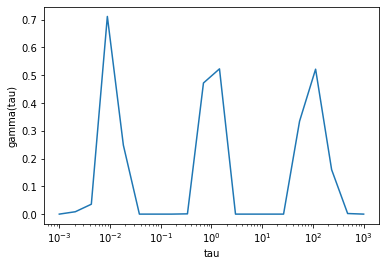

In [17]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/(1+(2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

R1 = 1  # Ohms
C1 = 100  # Farads
R2=1
C2=1
R3= 1
C3= 1e-2

R_inf = 0.1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)



R_inf = 0.1
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()


DRT 1 

before solve


/tmp/ipykernel_298/1848077539.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


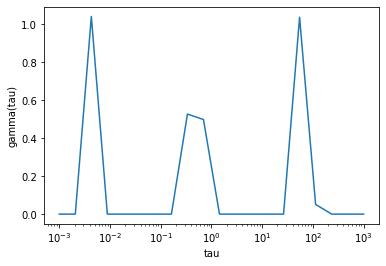

NameError: name 'R' is not defined

In [18]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

R1 = 1  # Ohms
C1 = 100  # Farads
R2=1
C2=1
R3= 1
C3= 1e-2

R_inf = 0.1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)



R_inf = 0.1
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()

# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)

# Trouvons le tau qui donne le gamma maximum
max_index = np.argmax(gamma_values)
max_gamma = gamma_values[max_index]
max_tau = tau_values[max_index]

#max_tau = np.exp(ln_tau[max_index])
RC=R*C
print("max index : ",max_index)
print("max tau : ",max_tau)
print("R vaut :", R)
print("C vaut :", C)
print("RC =",RC)



DRT3

before solve


/tmp/ipykernel_292/2591419495.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


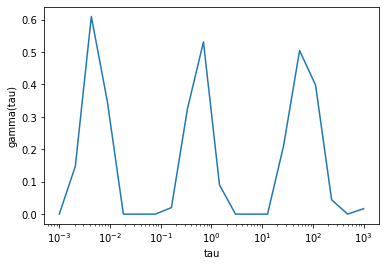

max index :  17
max tau :  0.004281332398719395
R vaut : 1
C vaut : 100
RC = 100


In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

# Define the resistance and capacitance
R1 = 1  # Ohms
C1 = 100  # Farads
R2=1
C2=1
R3= 1
C3= 1e-2

R_inf = 0.1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)


A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()

# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)

# Trouvons le tau qui donne le gamma maximum
max_index = np.argmax(gamma_values)
max_gamma = gamma_values[max_index]
max_tau = tau_values[max_index]

#max_tau = np.exp(ln_tau[max_index])
RC=R*C
print("max index : ",max_index)
print("max tau : ",max_tau)
print("R vaut :", R)
print("C vaut :", C)
print("RC =",RC)

changement de phi 

before solve


/tmp/ipykernel_292/2743803799.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


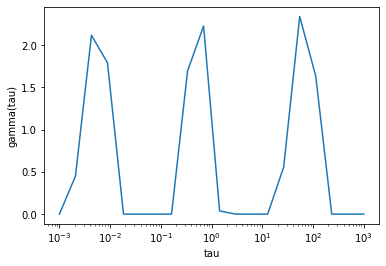

max index :  4
max tau :  54.555947811685186
R vaut : 1
C vaut : 100
RC = 100


In [ ]:

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.1

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici dirac
def phi(x, y, sigma):
    return np.where(np.abs(x - y) < 1e-9, 1, 0)

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

# Define the resistance and capacitance
R1 = 4  # Ohms
C1 = 100  # Farads
R2=4
C2=1
R3= 4
C3= 1e-2

R_inf = 1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)


A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()

# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)

# Trouvons le tau qui donne le gamma maximum
max_index = np.argmax(gamma_values)
max_gamma = gamma_values[max_index]
max_tau = tau_values[max_index]

#max_tau = np.exp(ln_tau[max_index])
RC=R*C
print("max index : ",max_index)
print("max tau : ",max_tau)
print("R vaut :", R)
print("C vaut :", C)
print("RC =",RC)

In [ ]:
def find_peaks(gamma_values, tau_values, n_peaks=6):
    # Trouvons les indices des n_peaks plus grands gamma
    peak_indices = np.argpartition(-gamma_values, n_peaks)[:n_peaks]

    # Récupérons les valeurs correspondantes de tau
    peak_taus = tau_values[peak_indices]

    # Récupérons les valeurs correspondantes de gamma
    peak_gammas = gamma_values[peak_indices]

    # Tri par ordre croissant de tau
    sorted_indices = np.argsort(peak_taus)
    peak_taus = peak_taus[sorted_indices]
    peak_gammas = peak_gammas[sorted_indices]

    return peak_taus, peak_gammas

# Utilisation de la fonction
peak_taus, peak_gammas = find_peaks(gamma_values, tau_values, n_peaks=6)

for i in range(6):
    print(f"Pic {i+1} : tau = {peak_taus[i]}, gamma = {peak_gammas[i]}")
    print('ln tau :',np.log(peak_taus[i]))


Pic 1 : tau = 0.004281332398719395, gamma = 2.115143004895299
ln tau : -5.45349100972274
Pic 2 : tau = 0.008858667904100828, gamma = 1.7899996662445765
ln tau : -4.726358875093041
Pic 3 : tau = 0.3359818286283784, gamma = 1.6938442780562228
ln tau : -1.0906982019445475
Pic 4 : tau = 0.6951927961775604, gamma = 2.224518187417806
ln tau : -0.3635660673148497
Pic 5 : tau = 54.555947811685186, gamma = 2.3378782431122858
ln tau : 3.9992267404633424
Pic 6 : tau = 112.8837891684689, gamma = 1.6324688253105029
ln tau : 4.726358875093041


Avec célia et variation de Sigma

/tmp/ipykernel_292/2743803799.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


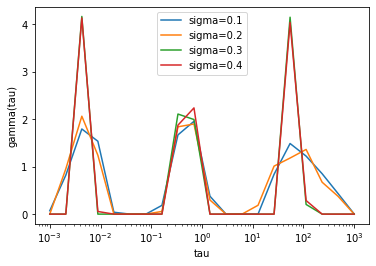

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs de sigma
sigma_values = [0.1, 0.2, 0.3, 0.4]

# Initialise le graphique
plt.figure()

# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma={sigma}')

# Ajoute des étiquettes et une légende
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()

# Affiche le graphique
plt.show()

before solve


/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


before solve
before solve
before solve


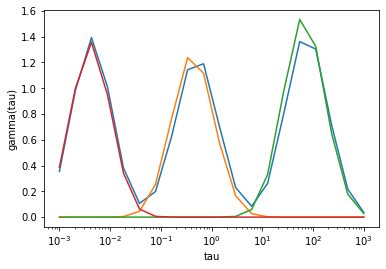

In [ ]:

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import integrate

# Paramètres 
lmbda = 1e-6
sigma = 0.8

# Nous allons supposer un certain nombre de fréquences logarithmiquement espacées
#frequencies = np.logspace(-4, 4, num=200)
#frequencies = np.logspace(np.log10(40), np.log10(4e8), 20)
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)

M = len(frequencies)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici dirac
def phi(x, y, sigma):
    return np.exp(-(sigma*(x - y))**2)

def Zdrt(R_inf, x, f):
    tau_values = 1/(2*np.pi*frequencies)
    #integral_approx = np.sum([(gamma(x, tau)*np.log(tau))/(1+2*np.pi*f*tau) for tau in tau_values])
    integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
    return R_inf + integral_approx

# La fonction gamma
def gamma(x, tau):
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# La fonction objectif
def L(x, Z_exp, R_inf, f, A):
    #print("in L")
    Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
    return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

# Fonction pour minimiser
def solve(Z_exp, R_inf, f, A):
    x0 = np.random.rand(M)  # Initialisation aléatoire
    bounds = [(0, None) for _ in range(M)]
    res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
    return res.x

def real_part(frequencies,R,C):
    # The real part of the response is given by 1 / (1 + (2*pi*f*R*C)**2)
    # return 1 / (1 + (2 * np.pi * frequencies * R * C)**2)
    impedance = R / (1 + 1j * 2 * np.pi * frequencies * C)
    return impedance.real

# Define the resistance and capacitance
R1 = 4  # Ohms
C1 = 100  # Farads
R2=4
C2=1
R3= 4
C3= 1e-2

R_inf = 1
# Calculate the real and imaginary parts of the response
Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)


A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp, R_inf, frequencies, A)
# Calculons gamma(x, tau) pour chaque tau et stockons les résultats ainsi que les valeurs de tau correspondantes
gamma_values = np.array([gamma(x, np.exp(t)) for t in ln_tau])
tau_values = np.exp(ln_tau)
# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

Z_exp2 = R_inf + real_part(frequencies,R2,C2) 
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp2, R_inf, frequencies, A)
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

Z_exp3 = R_inf + real_part(frequencies,R1,C1) 
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp3, R_inf, frequencies, A)
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

Z_exp3 = R_inf + real_part(frequencies,R3,C3) 
A = np.random.rand(M, M)  # Matrice A
print("before solve")
# Résoudre
x = solve(Z_exp3, R_inf, frequencies, A)
plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau])

plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()



In [ ]:
# Utilisation de la fonction
peak_taus, peak_gammas = find_peaks(gamma_values, tau_values, n_peaks=6)

for i in range(6):
    print(f"Pic {i+1} : tau = {peak_taus[i]}, gamma = {peak_gammas[i]}")
    print('ln tau :',np.log(peak_taus[i]))

Pic 1 : tau = 0.004281332398719395, gamma = 1.393412606095456
ln tau : -5.45349100972274
Pic 2 : tau = 0.008858667904100828, gamma = 1.0107410511045252
ln tau : -4.726358875093041
Pic 3 : tau = 0.3359818286283784, gamma = 1.143507737283755
ln tau : -1.0906982019445475
Pic 4 : tau = 0.6951927961775604, gamma = 1.1901816431835668
ln tau : -0.3635660673148497
Pic 5 : tau = 54.555947811685186, gamma = 1.3622111445980276
ln tau : 3.9992267404633424
Pic 6 : tau = 112.8837891684689, gamma = 1.304696823128798
ln tau : 4.726358875093041


/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


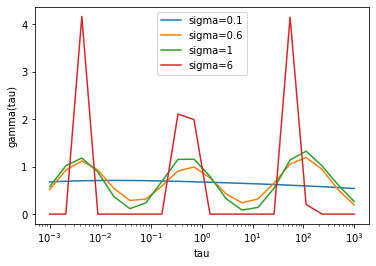

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs de sigma
sigma_values = [0.1, 0.6, 1, 6]

# Initialise le graphique
plt.figure()

# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma={sigma}')

# Ajoute des étiquettes et une légende
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()

# Affiche le graphique
plt.show()

/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


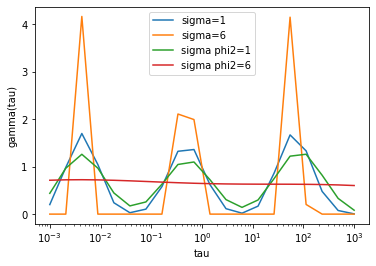

In [ ]:
import matplotlib.pyplot as plt

# Liste des valeurs de sigma
sigma_values = [1, 6]
# La fonction de base, ici une gaussienne

# Initialise le graphique
plt.figure()

# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma={sigma}')
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))
# Pour chaque valeur de sigma
for sigma in sigma_values:
    # Recalcule x avec la nouvelle valeur de sigma
    x = solve(Z_exp, R_inf, frequencies, A)

    # Affiche la fonction gamma
    gamma_values = [gamma(x, np.exp(t)) for t in ln_tau]
    plt.plot(np.exp(ln_tau), gamma_values, label=f'sigma phi2={sigma}')
# Ajoute des étiquettes et une légende
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()

# Affiche le graphique
plt.show()

Calcul tu temps 

In [ ]:
import time
sigma=1
# Liste des fonctions phi
phi_functions = [
    lambda x, y, sigma: np.exp(-sigma*(x - y)**2),
    lambda x, y, sigma: np.exp(-((x - y)**2)/(2*sigma**2)),
    lambda x, y, sigma: np.where(np.abs(x - y) < 1e-9, 1, 0),
    # Ajoutez d'autres fonctions phi ici si nécessaire
]

# Pour chaque fonction phi
for i, phi_func in enumerate(phi_functions):
    # Modifie la fonction phi globale
    def phi(x, y, sigma):
        return phi_func(x, y, sigma)
    
    # Marque le début du temps
    start_time = time.time()

    # Recalcule x
    x = solve(Z_exp, R_inf, frequencies, A)

    # Marque la fin du temps
    end_time = time.time()

    # Calcule et affiche le temps écoulé
    elapsed_time = end_time - start_time
    print(f"Temps écoulé pour la fonction phi {i+1} : {elapsed_time} secondes")



/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


Temps écoulé pour la fonction phi 1 : 50.35950946807861 secondes
Temps écoulé pour la fonction phi 2 : 66.81464767456055 secondes
Temps écoulé pour la fonction phi 3 : 76.82757306098938 secondes


Calcul de l'erreur sur Lambda mauvais code car intégré dans une fonciton prend les valeurs d'avant

Lancement d'un run


/tmp/ipykernel_292/404306658.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))
/tmp/ipykernel_292/3177254312.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


Lancement d'un run
Lancement d'un run


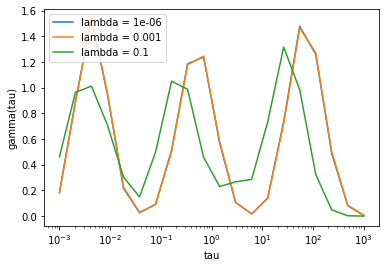

In [ ]:
# La fonction de base, ici dirac
def phi(x, y, sigma):
    return np.exp(-(sigma*(x - y))**2)

def run_simulation(lmbda):
    # Paramètres
    sigma = 0.9
    frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)
    M = len(frequencies)
    ln_tau = np.log(1/(2*np.pi*frequencies))

    def Zdrt(R_inf, x, f):
        tau_values = 1/(2*np.pi*frequencies)
        integral_approx = np.sum([(gamma(x, tau))/((1+2*np.pi*f*tau)**2) for tau in tau_values])
        return R_inf + integral_approx

    def gamma(x, tau):
        return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

    def L(x, Z_exp, R_inf, f, A):
        Z_prime = np.array([Zdrt(R_inf, x, freq) for freq in f])
        return np.sum((Z_exp - Z_prime)**2) + lmbda*np.sum((A@x)**2)

    def solve(Z_exp, R_inf, f, A):
        x0 = np.random.rand(M)  
        bounds = [(0, None) for _ in range(M)]
        res = minimize(lambda x: L(x, Z_exp, R_inf, f, A), x0, bounds=bounds)
        return res.x

    R1 = 4  
    C1 = 100  
    R2=4
    C2=1
    R3= 4
    C3= 1e-2
    R_inf = 1
    Z_exp = R_inf + real_part(frequencies,R1,C1) + real_part(frequencies,R2,C2) + real_part(frequencies,R3,C3)
    A = np.random.rand(M, M) 
    x = solve(Z_exp, R_inf, frequencies, A)
    return x

lmbdas = [1e-6, 1e-3, 1e-1]
plt.figure()

for lmbda in lmbdas:
    print("Lancement d'un run")
    x = run_simulation(lmbda)
    plt.plot(np.exp(ln_tau), [gamma(x, np.exp(t)) for t in ln_tau], label=f'lambda = {lmbda}')

plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.legend()
plt.show()


DRT avec kernel gausian au lieu de ridge 

/tmp/ipykernel_292/3496975757.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))


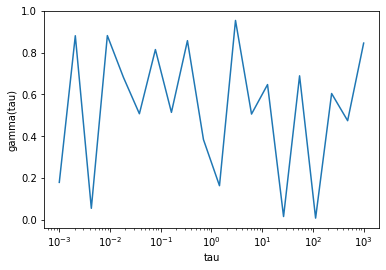

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Paramètres
sigma = 0.1
frequencies = np.logspace(np.log10(1/(2*np.pi*10**3)), np.log10(1/(2*np.pi*10**-3)), 20)
ln_tau = np.log(1/(2*np.pi*frequencies))

# La fonction de base, ici une gaussienne
def phi(x, y, sigma):
    return np.exp(-((x - y)**2)/(2*sigma**2))

# La fonction gamma
def gamma(x, tau):
    M = len(frequencies)
    return np.sum(x[i]*phi(np.log(tau), ln_tau[i], sigma) for i in range(M))

# Cette fonction calcule une matrice de noyau K où chaque élément K[i, j] est le résultat
# du noyau gaussien calculé entre X[i] et X[j].
def gaussian_kernel_matrix(X, sigma):
    N = X.shape[0]
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = np.exp(-(X[i] - X[j])**2 / (2*sigma**2))
    return K

def kernel_regression_method1(X, y, x0, sigma, pw=0.000001):
    N = X.shape[0]  # Nombre de points de données
    I = np.identity(N)  # Matrice identité de taille N

    # Calcul de la matrice de noyau K
    K = gaussian_kernel_matrix(X, sigma)

    # Inversion de la matrice K + pw*I. L'ajout de pw*I est une technique de régularisation pour éviter 
    # les problèmes numériques lors de l'inversion d'une matrice qui pourrait être singulière ou mal conditionnée.
    Kinv = inv(K + pw*I)

    # Calcul des coefficients a, qui sont utilisés pour pondérer les contributions de chaque point de données 
    # lors de la prédiction des valeurs de y pour de nouveaux points de données.
    a = np.matmul(Kinv, y)

    # Calcul des valeurs prédites y0 pour les points de prédiction x0.
    M = x0.shape[0]  # Nombre de points de prédiction
    y0 = np.zeros(M)
    for i in range(M):
        for j in range(N):
            y0[i] += a[j] * np.exp(-(x0[i] - X[j])**2 / (2*sigma**2))

    return y0

# Initialisation aléatoire de x
x = np.random.rand(len(frequencies))

# Calcul de y (gamma(tau) pour chaque tau)
y = np.array([gamma(x, np.exp(t)) for t in ln_tau])

# Estimation de x en utilisant la méthode de régression par noyau gaussien
x_estimated = kernel_regression_method1(ln_tau, y, ln_tau, sigma)

# Afficher la fonction gamma
plt.figure()
plt.plot(np.exp(ln_tau), [gamma(x_estimated, np.exp(t)) for t in ln_tau])
plt.xlabel('tau')
plt.xscale("log")
plt.ylabel('gamma(tau)')
plt.show()
